#Imports and Mounting the Drive

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#Vectorizing the Data

Important paths

In [0]:
path = '/content/gdrive/My Drive/CS 412 PROJECT'
path_train = '/content/gdrive/My Drive/CS 412 PROJECT/Train.csv'
path_test = '/content/gdrive/My Drive/CS 412 PROJECT/Test.csv'
path_img = '/content/gdrive/My Drive/CS 412 PROJECT/Data_SkinCancer/'
shapeX = 224
shapeY = 224

Reading image id's and categories into a dataframe

In [0]:
raw_train = pd.read_csv('/content/gdrive/My Drive/CS 412 PROJECT/data/Train.csv')

Creating a dictionary for the image paths

In [0]:
path = path_img
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob('/content/gdrive/My Drive/CS 412 PROJECT/Data_SkinCancer/*.jpg')}

Adding the image paths into the dataframe

In [0]:
raw_train['path'] = raw_train['Id'].map(imageid_path_dict.get)

In [0]:
raw_train.head() #sometimes it does not read the paths in the first place, when that happens we create the dictionary again and run the codes again

,Id,Category,path
0,Image_1,2,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...
1,Image_2,2,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...
2,Image_3,5,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...
3,Image_4,2,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...
4,Image_5,1,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...


In [0]:
raw_train['path'][5] #an example to check if it is working right

'/content/gdrive/My Drive/CS 412 PROJECT/Data_SkinCancer/Image_6.jpg'

Vectorizing images and resizing to 224x224 because original size is 600x450 using the paths and Image function of PIL (Python Imaging Library) //takes approximately 1 hour

In [0]:
raw_train['image'] = raw_train['path'].map(lambda x: np.asarray(Image.open(x).resize((shapeX,shapeY)))) #vectorizing and resizing

Showing one intance

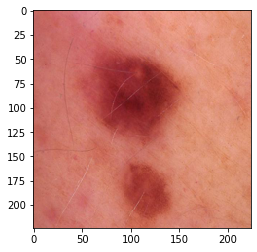

In [0]:
plt.imshow(raw_train['image'][0], interpolation='nearest')
plt.show()

In [0]:
raw_train["image"][0].shape
raw_train['Category'] = raw_train['Category'] - 1 #because having 0,1,2,3,4 would be better to not get errors
#raw_train['image'] = raw_train['image'].map(lambda img: img/255)

In [0]:
raw_train.to_pickle('/content/gdrive/My Drive/CS 412 PROJECT/dataRAW'+str(shapeX)+'x'+str(shapeY)+'.csv') #pickled to not lose any info

In [0]:
final_df = pd.read_pickle('/content/gdrive/My Drive/CS 412 PROJECT/dataRAW'+str(shapeX)+'x'+str(shapeY)+'.csv') #check to see if it works
final_df

,Id,Category,path,image
0,Image_1,1,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[191, 100, 95], [194, 104, 97], [194, 104, 9..."
1,Image_2,1,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[147, 127, 138], [148, 128, 139], [146, 126,..."
2,Image_3,4,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image_4,1,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[9, 4, 10], [6, 3, 8], [5, 3, 8], [7, 6, 11]..."
4,Image_5,0,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[216, 189, 153], [216, 187, 149], [216, 184,..."
...,...,...,...,...
9995,Image_9996,0,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[52, 36, 45], [51, 36, 45], [49, 38, 45], [4..."
9996,Image_9997,1,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
9997,Image_9998,1,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[1, 3, 0], [1, 3, 0], [1, 3, 0], [1, 3, 0], ..."
9998,Image_9999,0,/content/gdrive/My Drive/CS 412 PROJECT/Data_S...,"[[[150, 122, 136], [148, 119, 133], [145, 118,..."
